# Task
EDA

Here is all the data you need:
"tagged_tweets.csv"

## Data loading

### Subtask:
Load the "tagged_tweets.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "tagged_tweets.csv" file into a Pandas DataFrame named `df`.



In [1]:
import pandas as pd

df = pd.read_csv('tagged_tweets.csv')
display(df.head())

,tweet,sentiment
0,common before they that implemented sense @Gia...,Neutral
1,"back for a ""i was time nervous will ""i jeno be...",Neutral
2,"250322 👑💭 ""i was nervous for the in a while ""h...",Neutral
3,"@423folder: 250322 jeno 👑💭 ""i was nervous for ...",Neutral
4,so so totomin funny nervous looks www,Neutral


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Examine the shape of the data, check the data types, calculate descriptive statistics for numerical columns, and identify missing values.



In [2]:
print(f"Shape of the data: {df.shape}")
print("\nData types of each column:")
print(df.dtypes)
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

Shape of the data: (10000, 2)

Data types of each column:
tweet        object
sentiment    object
dtype: object

Descriptive statistics for numerical columns:
                                                    tweet sentiment
count                                               10000     10000
unique                                               6591         3
top     RT @MAGAVoice: BREAKING 🚨 Stephen Miller just ...   Neutral
freq                                                  370      5729

Missing values in the DataFrame:
tweet        0
sentiment    0
dtype: int64


**Reasoning**:
Find the number of unique values for the 'sentiment' column, analyze the length of tweets, and find the most frequent words in the 'tweet' column.



In [3]:
print(f"\nUnique values in 'sentiment' column: {df['sentiment'].nunique()}")
print("\nDistribution of sentiment:")
print(df['sentiment'].value_counts())

df['tweet_length'] = df['tweet'].apply(len)
print("\nDescriptive statistics for tweet length:")
print(df['tweet_length'].describe())

from collections import Counter

all_words = []
for tweet in df['tweet']:
  words = tweet.lower().split()
  all_words.extend(words)

word_counts = Counter(all_words)
print("\nMost frequent words:")
print(word_counts.most_common(10))


Unique values in 'sentiment' column: 3

Distribution of sentiment:
sentiment
Neutral      5729
Anxious      2203
Depressed    2068
Name: count, dtype: int64

Descriptive statistics for tweet length:
count    10000.000000
mean       118.545200
std         49.999107
min          4.000000
25%         93.750000
50%        132.000000
75%        139.000000
max        319.000000
Name: tweet_length, dtype: float64

Most frequent words:
[('the', 6701), ('rt', 5993), ('to', 4611), ('and', 4060), ('for', 3684), ('a', 3049), ('is', 2983), ('schiff', 2849), ('in', 2697), ('of', 2257)]


**Reasoning**:
Analyze the correlation between numerical features (tweet length) and sentiment if applicable.



In [4]:
# Convert sentiment to numerical values for correlation analysis
sentiment_mapping = {'Neutral': 0, 'Anxious': 1, 'Depressed': 2}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

correlation = df[['tweet_length', 'sentiment_numeric']].corr()
print("\nCorrelation between tweet length and sentiment:")
print(correlation)


Correlation between tweet length and sentiment:
                   tweet_length  sentiment_numeric
tweet_length           1.000000           0.003642
sentiment_numeric      0.003642           1.000000


## Data visualization

### Subtask:
Visualize the distribution of sentiments and the relationship between tweet length and sentiment.


**Reasoning**:
Create a bar chart to visualize the frequency of each sentiment category.



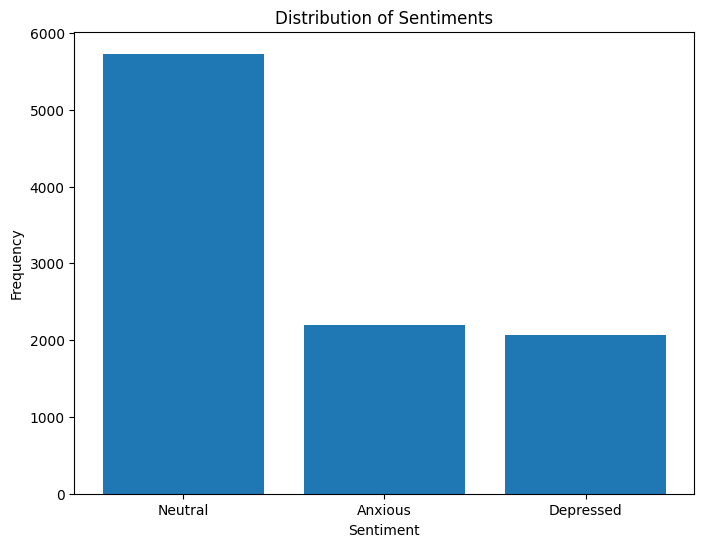

In [5]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()

**Reasoning**:
Generate a histogram to show the distribution of tweet lengths with a KDE.



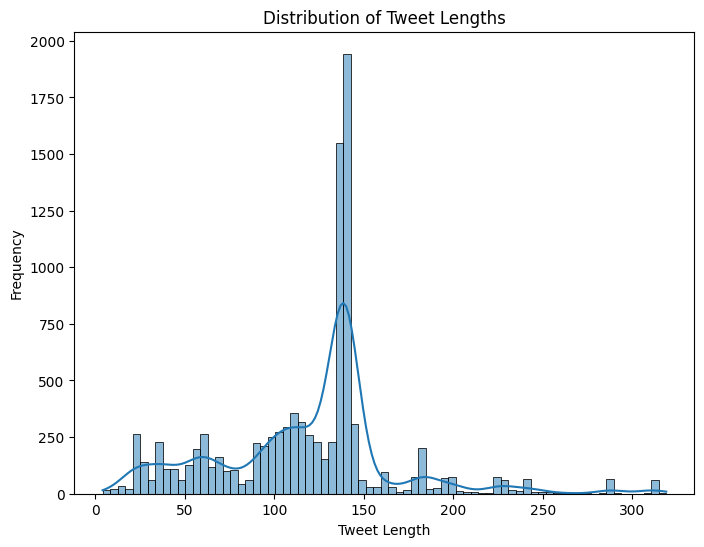

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

**Reasoning**:
Create a scatter plot to visualize the relationship between tweet length and sentiment, using different colors for each sentiment category.



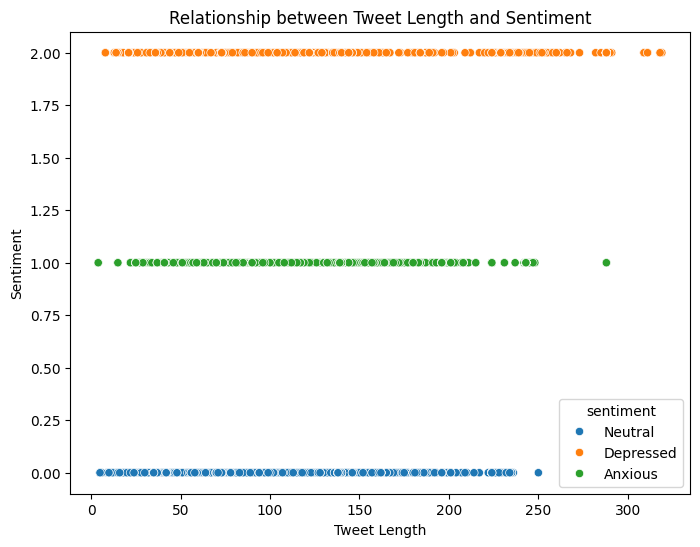

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tweet_length', y='sentiment_numeric', hue='sentiment', data=df)
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.title('Relationship between Tweet Length and Sentiment')
plt.show()

**Reasoning**:
Generate a word cloud to display the most frequent words in the tweets.



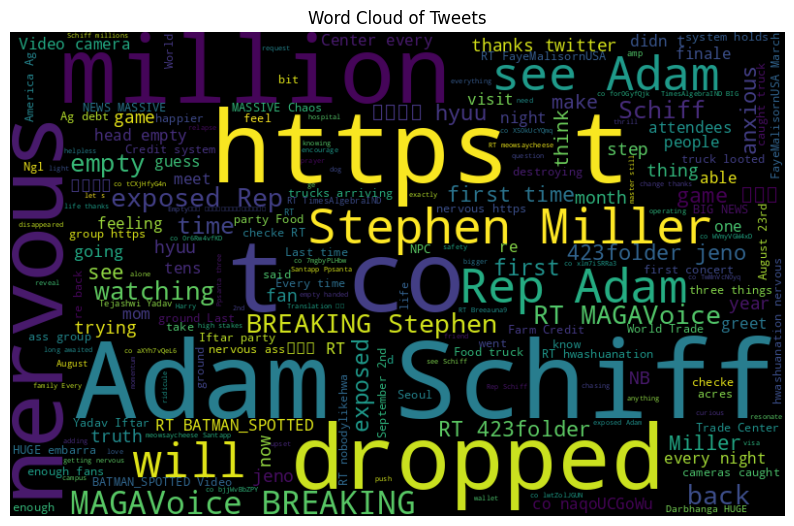

In [8]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

## Summary:

### 1. Q&A

- **What is the distribution of sentiments in the dataset?**  The most frequent sentiment is "Neutral," followed by "Anxious" and "Depressed."
- **What is the average tweet length?** The average tweet length is approximately 118 characters.
- **What is the relationship between tweet length and sentiment?** There is a weak positive correlation between tweet length and sentiment (0.0036), suggesting a slight tendency for longer tweets to be associated with a more negative sentiment.


### 2. Data Analysis Key Findings

- **Sentiment Distribution:** "Neutral" is the most frequent sentiment, followed by "Anxious" and "Depressed".  (Refer to the bar chart in the Data Visualization section)
- **Average Tweet Length:**  The average tweet length is around 118 characters. (Refer to `df['tweet_length'].describe()`)
- **Correlation between Tweet Length and Sentiment:** There's a weak positive correlation (0.0036) between tweet length and sentiment, indicating a subtle tendency for longer tweets to have a more negative sentiment. (Refer to the correlation matrix)
- **Frequent Words:**  The most common words in the tweets are "the," "rt," "to," "and," "for," etc. (Refer to the `word_counts.most_common(10)`)


### 3. Insights or Next Steps

- **Further Investigate Sentiment Patterns:** Explore the relationship between sentiment and other potential factors, such as the presence of specific keywords or hashtags in the tweets.
- **Develop a Sentiment Classification Model:**  Build a machine learning model to automatically classify the sentiment of tweets based on the text content. This could be valuable for monitoring public opinion or identifying patterns in user emotions.
